In [1]:
import numpy as np
import pandas as pd
import sklearn as ktl
import pickle
import matplotlib.pylab as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

## Importing satellite and survey data 

In [2]:
sdg_indexes = pd.read_csv("data/sdg_prediction/sdg_indexes.csv")
sat_mod = pd.read_csv("data/sdg_prediction/sat_mod.csv")

In [3]:
sat_mod = sat_mod.join(pd.get_dummies(sat_mod.dep))

## Define Features and labels 

In [4]:
X = sat_mod[['lnEGDPpc2012', 'lnagr_land2012', 'lnurb_land2012', 'ln_perUrb_land2012',
                'ln_tr400_pop2012', 'ln_pm25_2012', 'ln_land_temp2012','ln_dist_road2017','ln_ghsl2015', 'dist_diamond2015']]

X = sat_mod[['ln_t400NTLpc2012', "ln_perUrb_land2012", 'ln_land_temp2012','ln_tr400_pop2012','ln_dist_road2017','ln_ghsl2015', 
             "ln_dist_water2017mean",'ln_dist_drug2017mean', 'ln_elev2017mean', 'ln_pm25_2012','dist_diamond2015',   'lnagr_land2012', 
             'lnurb_land2012','ln_access2016mean', 'Beni', 'Chuquisaca', 'Cochabamba', 'La Paz',
             'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija']]

#'lnagr_land2012', 'lnurb_land2012', 'ln_tr400_pop2012','ln_land_temp2012','ln_dist_road2017','ln_ghsl2015', 'dist_diamond2015'
y = sdg_indexes["imds"]

np.random.seed(86)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Set up Lasso model 

In [5]:
model = linear_model.Lasso()
model.fit(X_train, y_train)

print("R2 training set", round(model.score(X_train, y_train)*100, 2))
print("R2 training set", round(model.score(X_test, y_test)*100, 2))

pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set:", round(mse_train, 2))

pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set:", round(mse_test,2))

R2 training set 45.59
R2 training set 43.0
MSE training set: 24.97
MSE test set: 25.66


### Lasso Coefficients 

In [6]:
# Lasso coefficients for all features 
coeff = model.coef_

#Extract the relevant coefficients 
relevant = np.array(X.columns)[coeff>0]
relevant

array(['ln_t400NTLpc2012', 'ln_ghsl2015'], dtype=object)

In [7]:
model.coef_

array([ 1.06795193e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.74863879e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.85032339e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [8]:
#dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])

In [9]:
print('R squared training set', round(model.score(X_train, y_train)*100, 2))
print('R squared test set', round(model.score(X_test, y_test)*100, 2))

R squared training set 45.59
R squared test set 43.0


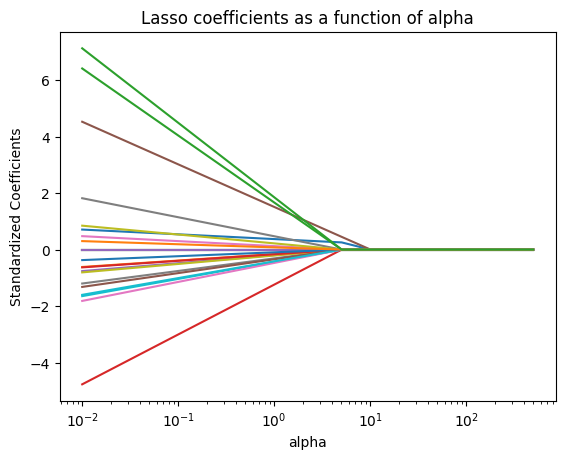

In [10]:
alphas = np.linspace(0.01,500,100)
lasso = linear_model.Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');